# CMS-COR-SAP. Exercise 2
By *Oleh Shkalikov*

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [3]:
def ecdf(x, t): # empirical cdf
    return np.mean(np.expand_dims(x, 1) <= t.T, axis=0)

## 1. Transformation of discrete random variables

a) Roll a dice ($X$) and multiply the value by $10$ ($Y = 10X$). What is the PMF of $Y$ ?

<center>

|PMF| $\frac{1}{6}$  | $\frac{1}{6}$  | $\frac{1}{6}$  | $\frac{1}{6}$  | $\frac{1}{6}$  | $\frac{1}{6}$  |
|---|---|---|---|---|---|---|
| X |  1 |  2 | 3  | 4  |  5 | 6  |
| Y | 10 | 20 | 30 | 40 | 50 | 60 |

</center>

b) Let $X$ be a discrete uniform random variable on $\{−n, −n + 1, \dots n − 1, n\}$. What is the
PMF of $Y = X^2$?

$$ P(Y = k) =
\begin{cases}
    \frac{1}{2n + 1} \quad& k = 0 \\
    \frac{2}{2n + 1} \quad& \exists m \in \{1, \dots, n \} : k = m^2\\
    0 \quad& \text{else}
\end{cases} $$

c) Let $X$ be a Poisson random variable on $x \in \{0, 1, 2, 3, ...\}$. What is the PMF of its linear
transformation $Y = aX + b$?

If $a \neq 0$:
$$ P(Y = r) =
\begin{cases}    
    e^{-\lambda} \frac{\lambda^{\left( \frac{r - b}{a} \right)}}{\left( \frac{r - b}{a} \right)!} \quad& \exists n \in \mathbb{N}_0 : n = \frac{r - b}{a} \\
    0 \quad& \text{else}
\end{cases} $$
Otherwise we have constant random variable $Y = b$ with PMF: 
$$ P(Y = r) =
\begin{cases}    
    1 \quad& r = b \\
    0 \quad& \text{else}
\end{cases} $$

## 2. Transformation of continuous random variables

Let $X \sim U (0, 1)$ where its PDF is:
$$
    f_X(x) = \begin{cases}
        1 \quad x \in [0, 1] \\
        0 \quad else
    \end{cases}
$$

a) What is the PDF of $Y$ if $Y = 2X$?

To solve this and following problems let's derive some general rule of the PDF transformation with some measurable function $g$
$$
f_Y(x) = \frac{d}{dx} F_Y(x) = \frac{d}{dx} P(g(X) \leq x) = \frac{d}{dx} P(X \leq g^{-1}(x)) = \frac{d}{dx} F_X(g^{-1}(x)) = f_X(g^{-1}(x)) \frac{d}{dx} g^{-1}(x)
$$

Therefore, for $g(x) = 2x$ we have that $g^{-1}(x) = \frac{x}{2}$, then $f_Y(x) = \frac{f_X(x)}{2}$. But also we have to change a domain of $f_Y$, thus we get:
$$
    f_Y(x) = \begin{cases}
        \frac{1}{2} \quad x \in [0, 2] \\
        0 \quad else
    \end{cases}
$$

b) What is the PDF of $Y$ if $Y = 2 − X$?

In this case $g(x) = 2 - x$, so $g^{-1}(x) = 2 - x$. So, using general rule from the previous task and changing a domain in accordance to $g$ we get:
$$
f_Y(x) = \begin{cases}
        1 \quad x \in [1, 2] \\
        0 \quad else
    \end{cases}
$$

c) What is the PDF of $Y$ if $Y = X^p$? 

Let's consider 3 cases:

1. $p < 0$

2. $p=0$
In this case we have a constant random variable which cannot have a PDF, but instead has a PMF
$$ P(Y = r) =
\begin{cases}    
    1 \quad& r = 1 \\
    0 \quad& \text{else}
\end{cases} $$

3. $p > 0$

## 3. Uniform random number generators

a) The linear congruential generator (LCG) gives pseudo-random numbers $\mu_i$ from a uniform distribution $U(0, 1)$. Implement a LCG using a multiplier $a = 7$, $ m = 2^{13} − 1$, and a seed of $z_0 = 1$.
Plot the number of samples generated $n~=~\{10, 20, 30, ..., 100\}$ vs. the distance between
the CDF of the generator and the analytical CDF. What do you observe?

In [4]:
def lcg(a, m, z0, n):
    res = np.empty(n)
    
    z = z0
    for i in range(n):
        z = (a * z) % m
        res[i] = z / m

    return res

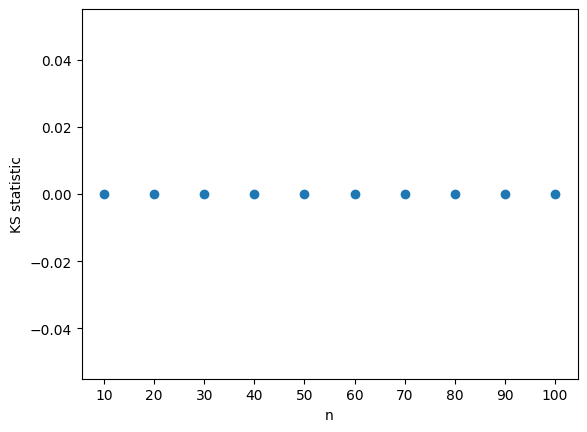

In [15]:
a, m, z0 = 7, 2**13 - 1, 1

N = np.arange(10, 110, 10)
dist = np.empty_like(N)
for i, n in enumerate(N):
    rv = lcg(a, m, z0, n)        
    dist[i], _ = stats.ks_1samp(rv, stats.uniform.cdf)

plt.scatter(N, dist)
plt.xticks(N)
plt.xlabel('n')
plt.ylabel('KS statistic');


b) Determine the cycle length of the linear congruential generator in (a).

In [5]:
for i in range(2, m+1):
    _, cnt = np.unique(lcg(a, m, z0, i), return_counts=True)    
    if not (cnt == 1).all():        
        print(f'Cycle lenght: {i - 1}')
        break

Cycle lenght: 1638


c) The additive low-discrepancy generator gives quasi-random numbers $\mu_i$ from a uniform
distribution $U(0, 1)$. Implement an additive low-discrepancy generator and compare this with the LCG in
by plotting $n = 200$ random points on a 2D unit square for each generator. Use $\alpha$ values $\alpha_x = \sqrt{2} − 1, \alpha_y = \frac{\sqrt{5} − 1}{2}$ in the additive low-discrepancy generator
and seed values $z_{0x} = 1$ and $z_{0y} = 1000$ in the linear congruential generator for each
dimension. Can you see any differences between the two generators?

In [6]:
def aldg(a, u0, n):
    res = np.empty(n)
    
    u = u0
    for i in range(n):
        u = (u + a) % 1
        res[i] = u

    return res

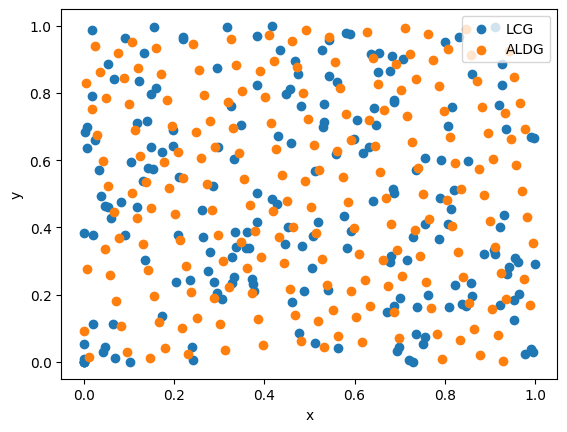

In [7]:
lcg_x = lcg(7, 2**31 - 1, 1, 200)
lcg_y = lcg(7, 2**31 - 1, 1000, 200)

u0x, u0y = np.random.uniform(size=2)
aldg_x = aldg(np.sqrt(2) - 1, u0x, 200)
aldg_y = aldg((np.sqrt(5) - 1)/2, u0y, 200)

plt.scatter(lcg_x, lcg_y, label='LCG')
plt.scatter(aldg_x, aldg_y, label='ALDG')
plt.legend()
plt.xlabel('x')
plt.ylabel('y');

## 4. Simulating other distributions from a uniform distribution

a) Simulate 100 random numbers from a Bernoulli distribution $Y \sim B(\frac{1}{2})$ generated
from $X \sim U(0, 1)$. Plot out $x$ versus $y$.

In [8]:
def gen_binomial(n, p):
    res = np.empty(n)
    us = np.empty(n)
    
    for i in range(n):
        u = np.random.uniform() 
        us[i] = u
        res[i] = 0 if u <= p else 1 

    return res, us

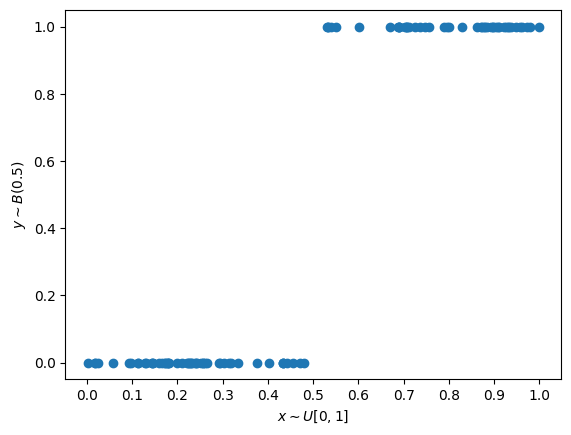

In [9]:
bern, u = gen_binomial(100, 0.5)

plt.scatter(u, bern)
plt.xticks(np.linspace(0, 1, 11));
plt.xlabel(r'$x \sim U[0, 1]$');
plt.ylabel(r'$y \sim B(0.5)$');

b) A random variable $Y$ takes values $1, 3$, and $4$ with probabilities $P(Y = 1) = \frac{3}{5}$,
$P (Y = 3) = \frac{1}{5}$, and $P(Y = 4) = \frac{1}{5}$ . Simulate $1000$ random numbers from $Y$ generated
from $X \sim U(0, 1)$. Plot out $y$ versus $P(y)$.

In [10]:
def gen_disc_finite_dist(p, n):
    cdf = np.cumsum(p)
    rv = np.empty(n, dtype=np.int32)
    us = np.empty(n)
    
    for i in range(n):
        u = np.random.uniform()
        us[i] = u
        rv[i] = np.argmax(cdf - u >= 0)

    return rv, us

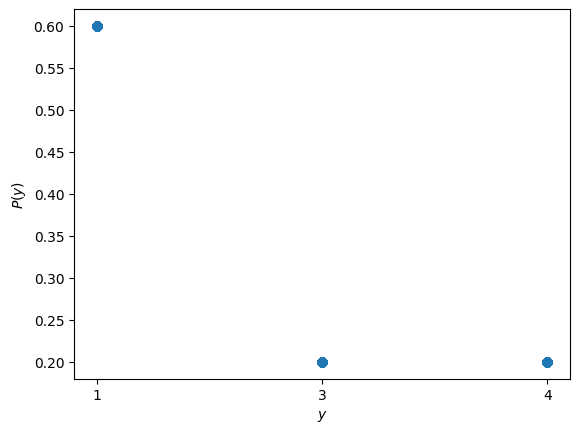

In [11]:
p = np.array([3/5, 1/5, 1/5])
disc_rv, us = gen_disc_finite_dist(p, 1000)

plt.scatter(disc_rv, p.take(disc_rv))

class_labels = [1, 3, 4]
plt.xticks(range(len(p)), class_labels);
plt.xlabel(r'$y$');
plt.ylabel(r'$P(y)$');

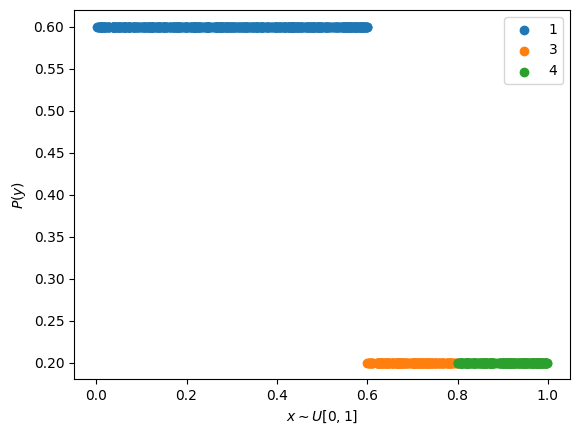

In [12]:
for i in range(len(p)):
    mask = disc_rv == i
    plt.scatter(us[mask], p.take(disc_rv[mask]), label = class_labels[i])

plt.legend()
plt.xlabel(r'$x \sim U[0, 1]$');
plt.ylabel(r'$P(y)$');

c) Find the inverse transform of $X \sim U (0, 1)$ to $Y \sim Exp(\lambda)$ with the CDF:
$$
F_Y (y) = \begin{cases}
    0 \quad y < 0 \\
    1 − e^{-\lambda y} \quad y ≥ 0
\end{cases}
$$

Simulate $1000$ random numbers from $Y \sim Exp(1)$ generated from $X \sim U(0, 1)$ using the
inverse transform. Plot $y \in [0, 10]$ versus the CDF of the simulation with the analytical
solution.

In [13]:
def gen_exp(n, lmbda, eps = 10**-12):
    rv = np.empty(n)    
    mult = - 1 / lmbda
    
    for i in range(n):
        u = np.random.uniform()        
        rv[i] = mult * np.log(u + eps)

    return rv

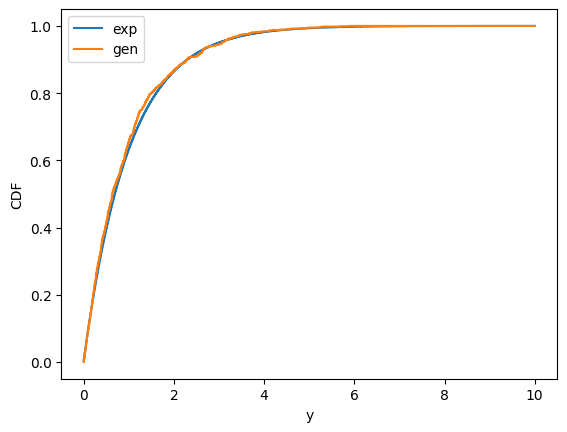

In [14]:
exp_gen_rv = gen_exp(1000, 1)

t = np.linspace(0, 10, 1000)
exp_gen_cdf = ecdf(exp_gen_rv, t)

plt.step(t, stats.expon.cdf(t), label='exp')
plt.step(t, exp_gen_cdf, label='gen')

plt.legend()
plt.xlabel('y')
plt.ylabel('CDF');